# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import warnings
warnings.filterwarnings('ignore')

# Data

In [7]:
geodata = gpd.read_file("./data/geojson/wojewodztwa-medium.geojson")
geodata.rename(columns={"nazwa": "voivodeship_name"}, inplace=True)
data = pd.read_csv("./data/salary_by_vivodership.csv")

merged_data = pd.merge(data, geodata, on="voivodeship_name")
merged_data = gpd.GeoDataFrame(merged_data, geometry=merged_data['geometry'])
merged_data.head(5)

,voivodeship_name,salary,id,geometry
0,dolnośląskie,6562.04,8,"POLYGON ((16.41620 51.78490, 16.41900 51.78500..."
1,kujawsko-pomorskie,5633.52,6,"POLYGON ((18.67680 53.69070, 18.67850 53.69080..."
2,lubelskie,5646.97,15,"POLYGON ((21.89000 51.92840, 21.88740 51.92910..."
3,lubuskie,5706.47,16,"POLYGON ((14.97420 51.36400, 14.97720 51.36550..."
4,łódzkie,5903.19,13,"POLYGON ((19.99270 51.13410, 19.98980 51.13460..."


# Map

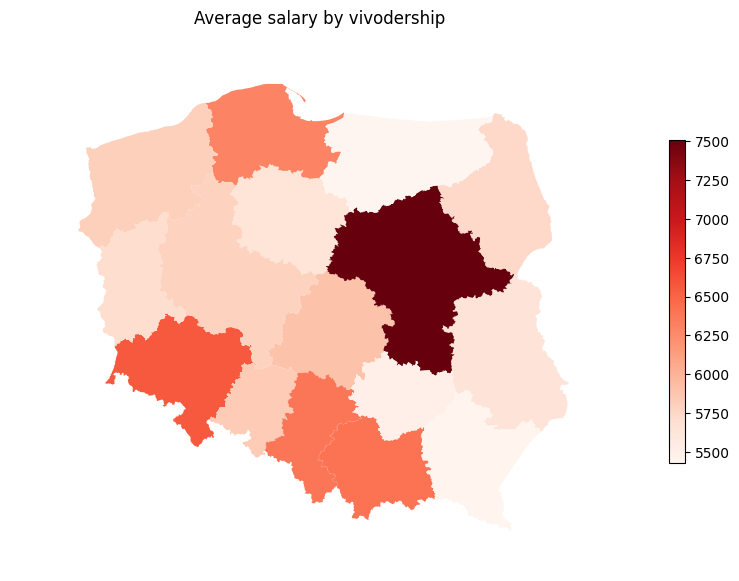

In [11]:
gplt.choropleth(
    merged_data,
    hue='salary',
    projection=gcrs.AlbersEqualArea(),
    figsize=(10, 7),
    cmap="Reds",
    legend=True,
    legend_kwargs={
        "shrink": 0.6
    }
)
plt.title("Average salary by vivodership")
plt.show()